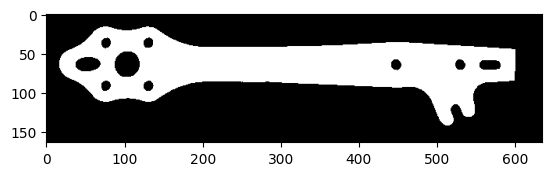

In [13]:
import imageio as iio

from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
from skimage import feature

from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open("demo1.jpg")

im_gray = np.array(img.convert('L'))
im_bool = im_gray < 160
im_bin255 = im_bool * 255
im_bin = im_bool * 1.

plt.imshow(im_bin, cmap=plt.cm.gray)

In [14]:
cent_pt = ndimage.measurements.center_of_mass(im_bin)

/var/folders/t8/4l7cl3f50bxf2hs1wf7rbgjm0000gp/T/ipykernel_73903/591118304.py:1: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  cent_pt = ndimage.measurements.center_of_mass(im_bin)


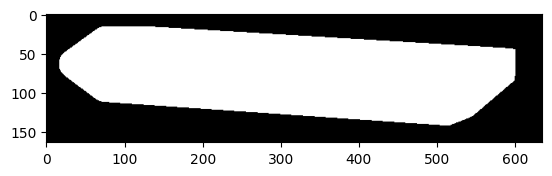

In [15]:
convimg = convex_hull_image(im_bin)

plt.imshow(convimg, cmap=plt.cm.gray)

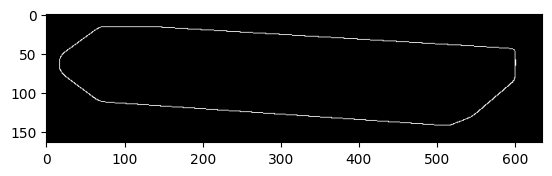

In [16]:
edges = feature.canny(convimg, sigma=3)

plt.imshow(edges, cmap=plt.cm.gray)

NameError: name 'minpos_x' is not defined

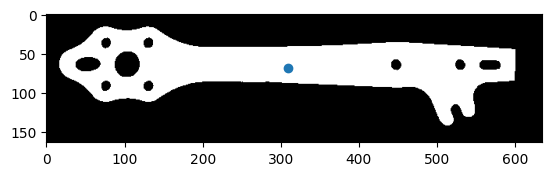

In [8]:
plt.imshow(im_bin, cmap=plt.cm.gray)
plt.scatter([cent_pt[1]], [cent_pt[0]])

plt.scatter([minpos_x], [minpos_y])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (
    morphological_chan_vese,
    morphological_geodesic_active_contour,
    inverse_gaussian_gradient,
    checkerboard_level_set,
)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store

# Morphological GAC
demo_img = Image.open("old_stuff/demo1.jpg")
im_gray = np.array(demo_img.convert('L'))
im_bool = im_gray < 160
im_bin255 = im_bool * 255
im_bin = im_bool * 1.
im_gray_thresh = im_gray.copy()
im_gray_thresh[im_gray_thresh < 160] = 0

image = im_bin
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(
    gimage,
    num_iter=230,
    init_level_set=init_ls,
    smoothing=1,
    balloon=-1,
    threshold=0.69,
    iter_callback=callback,
)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological GAC segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[1].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[1].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[1].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
demo_img = Image.open("old_stuff/demo3.jpg")

im_gray = np.array(demo_img.convert('L'))
im_bool = im_gray < 160
im_bin255 = im_bool * 255
im_bin = im_bool * 1.
im_gray_thresh = im_gray.copy()
im_gray_thresh[im_gray_thresh < 160] = 0

fig, ax = plt.subplots(1, 2, figsize=(7, 7))

ax[0].imshow(im_bin, cmap=plt.cm.gray)
ax[1].imshow(ndimage.binary_fill_holes(im_bin), cmap=plt.cm.gray)

plt.show()